How to generate a network?

You are familiar with a network. The basic components of a network are the nodes and links.
How you go about generating these nodes and links determines the network structure.

There are mainly three different network types defined in this code:

1. Delaunay (the nodes and links in the network are based on the Delaunay triangulation)
2. Buffon (They are made up of criss-crossing lines. Where the lines meet forms the nodes)
3. Voronoi (Similar to the Delaunay, based on the Voronoi points generation)
    (try to avoid the slab geometry [some bugs are not yet fixed :( ] )

We also have these three networks in two different configurations:

1. Circular (The nodes are randomly placed inside a circle. We send light into the network radially.)
2. Slab (The nodes are randomly placed inside a rectangle. We send light from one end of the rectangle to the other.)

In [32]:
# Genrating and initializing the network

# The physical structure of the network is generated using the generate_network method which is located inside the complex_networks.networks.network_factory module

# The generate_network method needs to know the type of network that we need to create. That is managed by the NetworkSpec class. which defines the specifications of the network we are going to generate.

# The network class is responsible for all the aspects of the network and is located in the complex_network.networks.network module

from complex_network.networks.network_factory import generate_network
from complex_network.networks.network_spec import NetworkSpec
from complex_network.networks.network import Network
import numpy as np

# Define the network specifications
spec = NetworkSpec(
    network_type="delaunay", # Options are: delaunay, voronoi, buffon

    network_shape="slab", # Options are : slab, circular

    network_size= (200e-6, 200e-6), # Slab: (width, height), Circular: radius [PROVIDE AS FLOAT NOT AS TUPLE FOR CIRCULAR]

    external_size = None, # Slab: None, Circular: float, exclusive to circular geometries [THE INTERNAL NODES WILL BE PLACED INSIDE A CIRCLE OF RADIUS NETWORK_SIZE. THE EXTERNAL NODES OR PORTS OF ILLUMINATION WILL BE PLACED AT RADIUS OF EXTERNAL_SIZE]

    external_offset= 10e-6, # Circular: None, Slab: float, exclusive to slab. [THE INTERNAL NODES ARE PLACED INSIDE A SLAB OF WIDTH AND HEIGHT. THE PORTS OF ILLUMINATION ARE KEPT ALONG THE EDGES OF THE SLAB AT -WIDTH, WIDTH. EXTERNAL OFFSET MAKES THE PORTS OF ILLUMINATION MOVE OUTWARD BY THIS OFFSET, SO THEY COME AT -WIDTH - OFFSET, WIDTH+OFFSET]

    num_internal_nodes= 10, # Number of internal nodes [NONE FOR VORONOI]

    num_external_nodes= 1, # Number of external nodes, [FOR SLAB GEOMETRIES, THIS MEANS 1 EXTERNAL NODE PER END, WHICH MEANS THERE WILL BE 2 EXTERNAL NODES (FOR BOTH ENDS), AND IT VARIES FOR SOME TYPES, PLAY AROUND AND FIND OUT HOW IT WORKS]

    num_seed_nodes= None, # Usually used for voronoi networks. [FOR VORONI NETWORKS, NUM_INTERNAL_NODES IS NONE, INSTEAD IT IS NUM_SEED_NODES]

    random_seed= 10, # Random seed for reproducibility [WE ARE GENERATING RANDOM NETWORKS]

    node_S_mat_type= 'neumann', # Options are: neumann, COE, CUE, identity..etc..

    node_S_mat_params= None, # 'str' Parameters for the node S matrix

    fully_connected= True, # Whether the network is fully connected or not [IF TRUE, ALL THE NODES ARE CONNECTED TO EACH OTHER BY ATLEAST ONE PATH. IF FALSE, WE GET MULTIPLE DISCONNECTED NETWORKS USED BY BUFFON NETWORKS]

    node_dict = None, # A dictionary of node specific parameters (if any) [THIS IS WHAT YOU WILL USE TO GENERATE CUSTOM NETWORKS, THESE ARE THE NODE PARAMETERS OF THE CUSTOM NETWORK. IF THIS IS PROVIDED, THE REST CAN BE SET TO NONE EXCEPT NODE_S_MAT_TYPE AND NODE_S_MAT_PARAMS]

    link_dict= None # A dictionary of link specific parameters (if any) [THIS IS WHAT YOU WILL USE TO GENERATE CUSTOM NETWORKS, THESE ARE THE LINK PARAMETERS OF THE CUSTOM NETWORK. IF THIS IS PROVIDED, THE REST CAN BE SET TO NONE]

)

# Generate the network using the NetworkSpec object
network = generate_network(spec)  # This is a Network Object

# The network is initialized when generated.


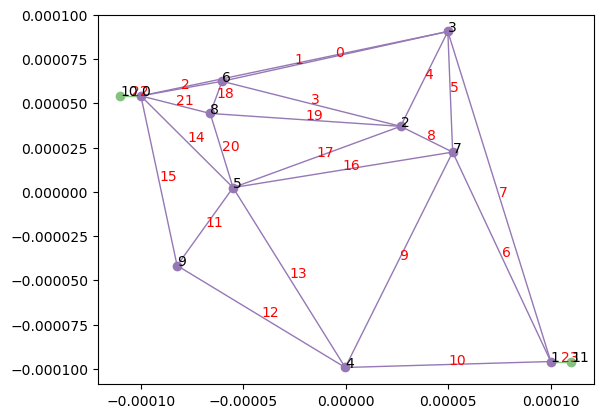

In [33]:
# Draw the network
network.draw(show_indices=True)


In [34]:
network.get_S_ee(6.28e6)  # Get the scattering matrix of the network at a frequency of 6.28 MHz

array([[-0.92468206+0.12281352j, -0.14175275-0.33133985j],
       [-0.14175275-0.33133985j, -0.7273911 +0.58397111j]])

In [35]:
# For retreiving paths. For this, we need a source node [WHERE THE PATH STARTS] and an end node [WHERE THE PATH ENDS]. Also, we will be only looking at simple paths

# For the above network, lets set the start node as node 10 and the end node as node 11
start_node = 10
end_node = 11

# Simple paths are retrieved through the 'breadth_first_search_simple_paths'

paths = network.breadth_first_search_simple_paths(start_node, end_node)

# printing the first 10 paths
paths[0:10]

# other paramters in this method:

# max_path_length  np.inf ,for no limit [ASSUMING YOU ARE WORKING WITH SMALL NETWORKS, OTHERWISE IT WILL TAKE A LOT OF TIME]

# use_mult_proc: False, for no multiprocessing [IF YOU ARE WORKING WITH MEDIUM SIZED NETWORKS, THIS CAN SPEED UP THE PATH GENERATION. SOMETIMES ALL THE PATHS ARE NOT GENERATED SO DEFAULT IS KEPT FALSE] , also someother parameters related to parallel processing you neednt worry about


[array([10,  0,  3,  1, 11]),
 array([10,  0,  3,  7,  1, 11]),
 array([10,  0,  5,  4,  1, 11]),
 array([10,  0,  5,  7,  1, 11]),
 array([10,  0,  6,  3,  1, 11]),
 array([10,  0,  9,  4,  1, 11]),
 array([10,  0,  3,  2,  7,  1, 11]),
 array([10,  0,  3,  7,  4,  1, 11]),
 array([10,  0,  5,  2,  3,  1, 11]),
 array([10,  0,  5,  2,  7,  1, 11])]

In [36]:
# Get the path_lengths of any paths. The paths are returned as arrays. The method, get_path_length will provide the path_length of any path in the network

# Lets try to find the path_length of the first path, we got above
path = paths[0]
path_length = network.get_path_length(path)

# You can also get the lengths along the path, meaning the length of each link in the path
lengths_along_path = network.get_lengths_along_path(path)

# You can also get the optical path length of the path. optical_path_length = path_length*n (refractive index ~ 1.5)
optical_path_length = network.get_optical_path_length(path) # depends on frequency k (set to 1e7), does not account for dispersion currently

print('length of first path: ', path_length)
print('lengths along first path: ', lengths_along_path)
print('optical length of first path: ', optical_path_length)


length of first path:  0.00036729984188138825
lengths along first path:  [1.00000000e-05 1.54124330e-04 1.93175512e-04 1.00000000e-05]
optical length of first path:  0.0005509497628220823


In [37]:
# Number of scattering events is the number of nodes the path interacted with,
# The size of the array in the path is the number of scatteres in the path

num_scatters_in_path = [len(p) for p in paths]

# printing the number of scatteres in the first 10 paths
num_scatters_in_path[0:10]

[5, 6, 6, 6, 6, 6, 7, 7, 7, 7]

In [38]:
# get the position coordinates of the nodes in the network in the form [X,Y]
# The get_node method returns a node object, from which we can access the position attribute
# the get_node takes the node_index as the argument
node_index = 0
node_position = network.get_node(node_index).position
node_position

array([-1.00000000e-04,  5.42641287e-05])

In [39]:
# Moving the nodes of a network around
# The first argument is the node_index and the second argument is 
# the translation vector (dx, dy)

# Here I moved node 3 by -25e-6 along the x-axis and -25e-6 along the y-axis
network.translate_node(3, (-25e-6, -25e-6))

#NOTE: THIS CHANGES THE STRUCTURE OF THE ORIGINAL NETWORK STRUCTURE. IF YOU WANT BOTH NETWORKS AT THE SAME TIME, CONSIDER MAKING TWO COPIES OF THE NETWORK AND THEN CHANGING ONE

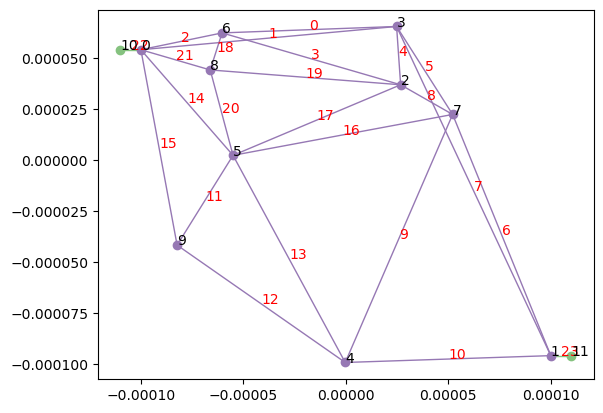

In [40]:
network.draw(show_indices=True)

In [41]:
# The scattering matrix of the updated network
network.get_S_ee(6.28e6)

array([[-0.9466467 +0.15410881j, -0.13378313-0.2494245j ],
       [-0.13378313-0.2494245j , -0.65203897+0.70337378j]])

In [42]:
# Get the modified paths and path_lengths. paths remain the same as the position was the only attribute changed

start_node = 10
end_node = 11

modified_paths = network.breadth_first_search_simple_paths(start_node, end_node)

# print the first 10 modified paths
print(modified_paths[0:10])

# print the path lengths of the modified paths
print([network.get_path_length(p) for p in modified_paths[0:10]])

# The other arguments can also be called in the same way
# Scattering in the path can also be found using the same way.

[array([10,  0,  3,  1, 11]), array([10,  0,  3,  7,  1, 11]), array([10,  0,  5,  4,  1, 11]), array([10,  0,  5,  7,  1, 11]), array([10,  0,  6,  3,  1, 11]), array([10,  0,  9,  4,  1, 11]), array([10,  0,  3,  2,  7,  1, 11]), array([10,  0,  3,  7,  4,  1, 11]), array([10,  0,  5,  2,  3,  1, 11]), array([10,  0,  5,  2,  7,  1, 11])]
[np.float64(0.00032347367760659953), np.float64(0.0003240648640851115), np.float64(0.0003044162672321542), np.float64(0.00032529709762043506), np.float64(0.0003238630474005738), np.float64(0.00031808556753267294), np.float64(0.00033089444589241997), np.float64(0.0004292593706226455), np.float64(0.00038427793870401787), np.float64(0.0003343499474822647)]


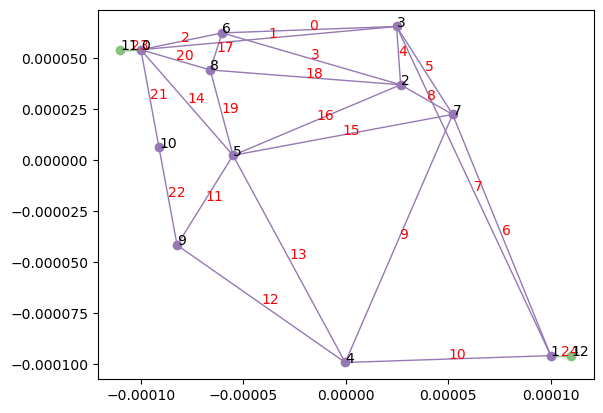

In [ ]:
# adding a node in between a network link

link_index = 15 # Index of the link you want to add the node to
fractional_position = 0.5 # Fractional position along the link where the node will be added (0 to 1)

def new_get_S(k):
    new_get_S = np.array([[np.sqrt(0.9), np.sqrt(0.1)], 
                           [np.sqrt(0.1), -np.sqrt(0.9)]])  
    return new_get_S

# Example 2x2 scattering matrix for the new node that reflects 90% of light and transmittes 10% of light. They have to be callable fucnctions

# Inverse of the scattering matrix
def new_get_S_inv(k):
    return new_get_S(k)  # For a lossless node, S_inv is the same as S

# derivative of the scattering matrix
def new_get_dS(k):
    new_get_dS = np.array([[0, 0], [0, 0]])
    return new_get_dS

network.add_node_to_link(link_index, 
                         fractional_position,
                         new_get_S=new_get_S,
                         new_get_S_inv=new_get_S_inv,
                         new_get_dS=new_get_dS)


# new_get_S, new_get_S_inv, and new_get_dS are optional they are set to default values. 

network.draw(show_indices=True)

# THIS WILL ADD A NODE IN BETWEEN A LINK AT A FRACTIONAL POSITION, MEANING THAT THE NODE WILL BE PLACED AT (r1 + fraction*length_), r1 is the position of node 1, which is the node with the smaller index in the link. length is the length of the link

# You see that a node was added at the midway point (frac=0.5) from node 0 (smaller indexed node in the link)

In [44]:
network.get_S_ee(6.28e6)  # Get the scattering matrix of the network at a frequency of 6.28 MHz

array([[-0.76181576+0.51096243j, -0.25406318-0.30660403j],
       [-0.25406318-0.30660403j, -0.64360472+0.65361979j]])

In [ ]:
# DO YOU WANT THE ABILITY TO ADD A NEW NODE TO ANY POSITION WITH DESCRIBED CONNECTIONS IN THE NETWORK? 

# This is not currently supported in the network module. If you want the functionality, please reach out and I will write it for you.

# Currently, you can move the nodes around and insert nodes in between links.
